# Projeto 1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import yfinance as yf
import openpyxl as op

In [7]:
lista_tickers = ["ITUB4.SA", 'BBAS3.SA', "SANB4.SA", "BBDC4.SA", "^BVSP"]

In [8]:
dados_bancarios = yf.download(lista_tickers, start = "2010-01-01", end = "2022-04-30")

dados_bancarios = dados_bancarios["Adj Close"]

display(dados_bancarios)

[*********************100%%**********************]  5 of 5 completed


Ticker,BBAS3.SA,BBDC4.SA,ITUB4.SA,SANB4.SA,^BVSP
Date,,,,,
2010-01-04,5.520325,6.973938,10.610387,4.719924,70045.0
2010-01-05,5.464935,6.939621,10.679144,4.719924,70240.0
2010-01-06,5.472323,6.884104,10.586583,4.719924,70729.0
2010-01-07,5.474166,6.865598,10.478152,4.719924,70451.0
2010-01-08,5.505556,6.858193,10.319469,4.719924,70263.0
...,...,...,...,...,...
2022-04-25,14.333274,16.310904,22.350563,15.453597,110685.0
2022-04-26,14.011084,15.610647,21.590109,14.751159,108213.0
2022-04-27,14.073042,15.704575,21.415281,14.759940,109349.0


In [9]:
lucro_bancos = pd.read_excel("lucro_bancos_2010_2022.xlsx")

lucro_bancos

,data,bradesco,banco_do_brasil,itau,santander
0,2009-12-31,8012282,10147522,10066608,1805899
1,2021-12-31,21945688,19710402,24988000,14987716


### Conceitos importantes

In [10]:
data_frame_com_colunas_selecionadas = dados_bancarios[["BBDC4.SA", "ITUB4.SA"]]

In [11]:
dados_2015 = dados_bancarios[dados_bancarios.index > "2015-01-01"]

In [12]:
cotacao_maior_que_15 = dados_bancarios[dados_bancarios["ITUB4.SA"] > 15]

### Voltando ao nosso projeto

In [13]:
itau = dados_bancarios["ITUB4.SA"]
bradesco = dados_bancarios["BBDC4.SA"]
banco_do_brasil = dados_bancarios["BBAS3.SA"]
santander = dados_bancarios["SANB4.SA"]
dados_mercado = dados_bancarios["^BVSP"]

dados_mercado

Date
2010-01-04     70045.0
2010-01-05     70240.0
2010-01-06     70729.0
2010-01-07     70451.0
2010-01-08     70263.0
                ...   
2022-04-25    110685.0
2022-04-26    108213.0
2022-04-27    109349.0
2022-04-28    109919.0
2022-04-29    107876.0
Name: ^BVSP, Length: 3056, dtype: float64

In [14]:
def retorno(lista_cotacoes):

    retorno = lista_cotacoes[-1]/lista_cotacoes[0] - 1

    return retorno

In [15]:
retorno_itau = retorno(itau)
retorno_bradesco = retorno(bradesco)
retorno_banco_brasil = retorno(banco_do_brasil)
retorno_santander = retorno(santander)
retorno_dados_mercado = retorno(dados_mercado)

retorno_dados_mercado

C:\Users\guilh\AppData\Local\Temp\ipykernel_6964\1300698524.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno = lista_cotacoes[-1]/lista_cotacoes[0] - 1


0.5400956527946321

In [16]:
df_retornos = pd.DataFrame(

    data = {"retornos": [retorno_itau, retorno_bradesco, retorno_banco_brasil, retorno_santander, retorno_dados_mercado]},
    index = ["Itau", "Bradesco", "Banco do Brasil", "Santander", "Ibovespa"]

)

df_retornos

,retornos
Itau,0.966432
Bradesco,1.201691
Banco do Brasil,1.485713
Santander,2.093671
Ibovespa,0.540096


In [17]:
df_retornos["retornos"] = df_retornos["retornos"] * 100

df_retornos

,retornos
Itau,96.643225
Bradesco,120.169065
Banco do Brasil,148.571266
Santander,209.367112
Ibovespa,54.009565


In [18]:
df_retornos = df_retornos.sort_values(by = "retornos", ascending = False)

df_retornos

,retornos
Santander,209.367112
Banco do Brasil,148.571266
Bradesco,120.169065
Itau,96.643225
Ibovespa,54.009565


In [19]:
!pip install mplcyberpunk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\guilh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import mplcyberpunk

In [21]:
plt.style.use("cyberpunk")

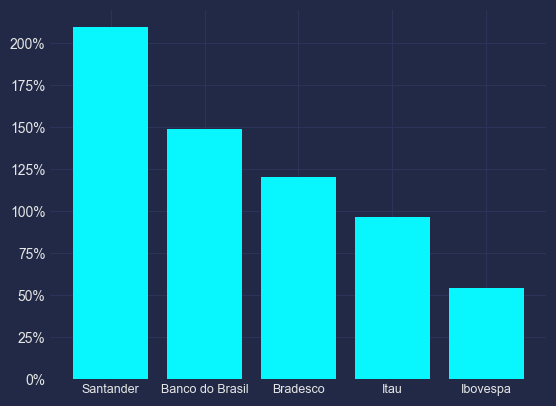

In [22]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index, df_retornos["retornos"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

In [23]:
lucro_bancos

,data,bradesco,banco_do_brasil,itau,santander
0,2009-12-31,8012282,10147522,10066608,1805899
1,2021-12-31,21945688,19710402,24988000,14987716


In [24]:
lucro_bancos = lucro_bancos.set_index("data")

lucro_bancos

,bradesco,banco_do_brasil,itau,santander
data,,,,
2009-12-31,8012282,10147522,10066608,1805899
2021-12-31,21945688,19710402,24988000,14987716


In [25]:
var_lucro_bancos = lucro_bancos.iloc[-1]/lucro_bancos.iloc[0] - 1

var_lucro_bancos

bradesco           1.739006
banco_do_brasil    0.942386
itau               1.482266
santander          7.299310
dtype: float64

In [26]:
var_lucro_bancos = var_lucro_bancos * 100

In [27]:
var_lucro_bancos = var_lucro_bancos.sort_values(ascending = False)

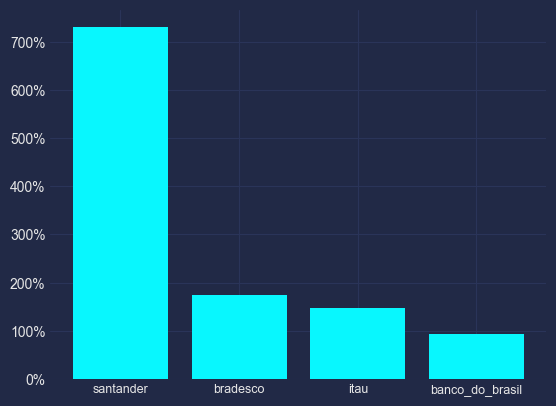

In [28]:
fig, ax = plt.subplots()

ax.bar(var_lucro_bancos.index, var_lucro_bancos.values)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

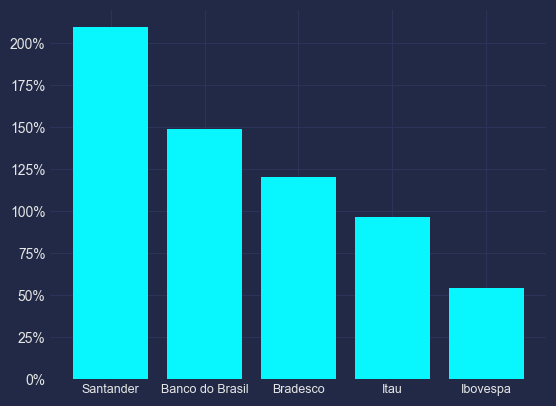

In [29]:
fig, ax = plt.subplots()

ax.bar(df_retornos.index, df_retornos["retornos"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xticks(fontsize = 9)

plt.show()

# Projeto 2

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import yfinance as yf
plt.style.use("cyberpunk")

In [31]:
itau = yf.download("ITUB4.SA", start = "2010-01-01", end = "2022-04-30")["Adj Close"]
bradesco = yf.download("BBDC4.SA", start = "2010-01-01", end = "2022-04-30")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [32]:
def resample_periodo(dado, periodo):

    dado_periodo_novo = dado.resample(f"{periodo}").last()
    dado_periodo_novo = dado_periodo_novo.pct_change()
    dado_periodo_novo = dado_periodo_novo.dropna()

    return dado_periodo_novo



In [33]:
def long_short(long, short, periodo):

    var_long = resample_periodo(long, periodo)
    var_short = resample_periodo(short, periodo)

    outperform = (var_long - var_short) * 100
    print(outperform)
    plt.plot(outperform)

Date
2011-12-31    -8.801053
2012-12-31   -16.242133
2013-12-31    15.535478
2014-12-31    -2.885146
2015-12-31    17.876875
2016-12-31   -23.733299
2017-12-31    -2.886166
2018-12-31    -2.083037
2019-12-31   -13.436248
2020-12-31     2.668694
2021-12-31   -12.749677
2022-12-31    10.901116
Freq: A-DEC, Name: Adj Close, dtype: float64


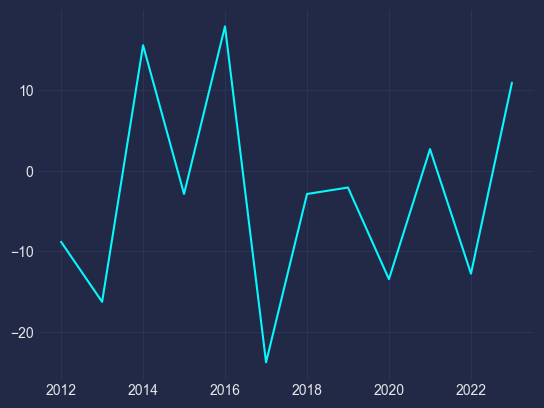

In [34]:
long_short(itau, bradesco, "Y")